In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, f1_score, balanced_accuracy_score,
                             confusion_matrix, classification_report)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, mutual_info_classif




In [ ]:
df = pd.read_csv("fetal_health.csv")

**2) Preprocessing checks + Summary statistics**

In [ ]:
print("\n=== Dataset Info ===")
print(df.info())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_sh

In [ ]:
df.shape

(2126, 22)

In [ ]:
#befor remove
df[df.duplicated()]


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,...,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,...,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


In [ ]:
#After remove
df = df.drop_duplicates()
df[df.duplicated()]


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health


# **split**

In [ ]:
target = "fetal_health"
X = df.drop(columns=[target])
y = df[target]


In [ ]:
print("\n=== Missing Values (per column) ===")
print(df.isna().sum())


=== Missing Values (per column) ===
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
his

In [ ]:
print("\n=== Summary Statistics ===")
print(df.describe())


=== Summary Statistics ===
       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2113.000000    2113.000000     2113.000000           2113.000000   
mean       133.304780       0.003188        0.009517              0.004387   
std          9.837451       0.003871        0.046804              0.002941   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.005000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2113.000000           2113.000000               2113.000000   
mean              0.001901              0.000003                  0.000159   
std               0.002966         

**3) Exploratory Data Analysi (EDA)**

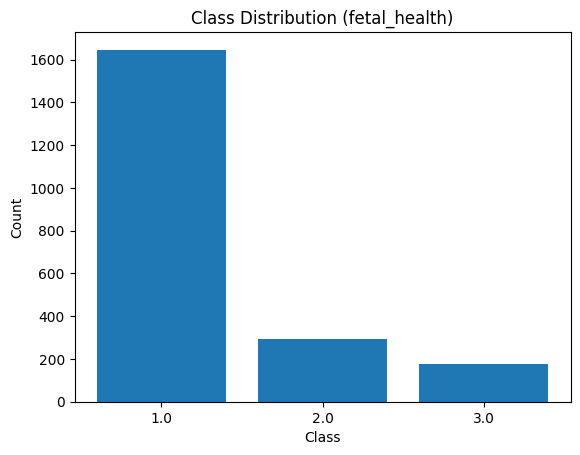

In [ ]:
# 3.1 Class distribution
counts = y.value_counts().sort_index()
plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.title("Class Distribution (fetal_health)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

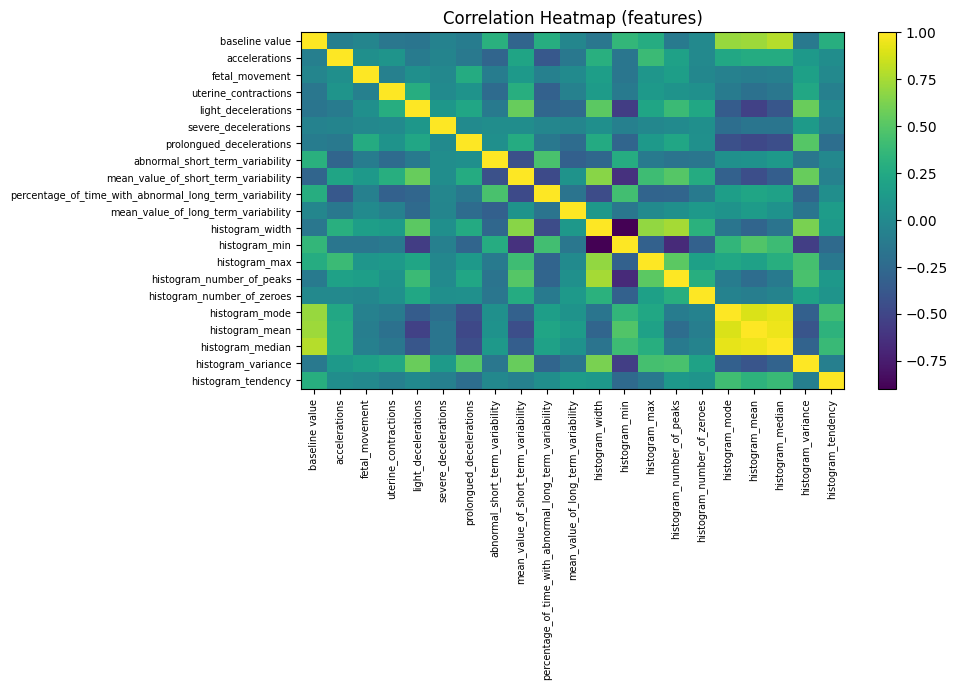

In [ ]:
# 3.2 Correlation heatmap
corr = X.corr(numeric_only=True)
plt.figure(figsize=(10, 7))
plt.imshow(corr, aspect="auto")
plt.title("Correlation Heatmap (features)")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=7)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=7)
plt.tight_layout()
plt.show()

In [ ]:
imputer_for_mi = SimpleImputer(strategy="median")
X_imp = imputer_for_mi.fit_transform(X)

mi_scores = mutual_info_classif(X_imp, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

top4_features = mi_series.head(4).index.tolist()
print("\n=== Top 10 Features by Mutual Information ===")
print(mi_series.head(10))



=== Top 10 Features by Mutual Information ===
mean_value_of_short_term_variability                      0.212369
abnormal_short_term_variability                           0.190062
percentage_of_time_with_abnormal_long_term_variability    0.185775
histogram_mean                                            0.168325
histogram_median                                          0.143843
histogram_variance                                        0.142783
baseline value                                            0.141757
histogram_mode                                            0.138326
histogram_width                                           0.137382
accelerations                                             0.127909
dtype: float64


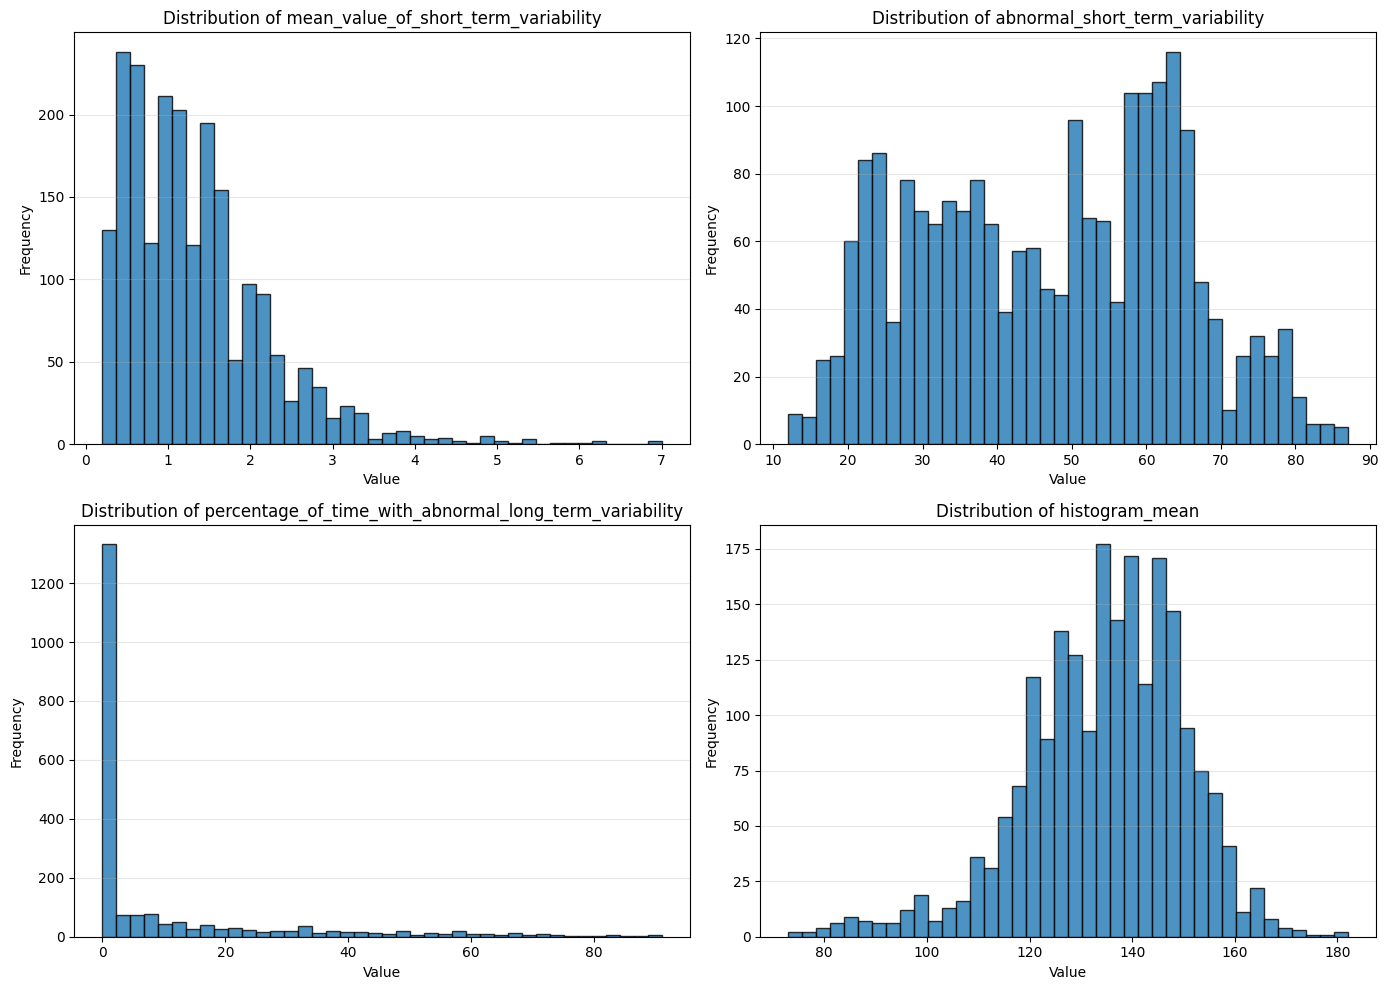

In [ ]:
#Feature Selection with heatmap
features = [
    'mean_value_of_short_term_variability',
    'abnormal_short_term_variability',
    'percentage_of_time_with_abnormal_long_term_variability',
    'histogram_mean'
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, feature in zip(axes, features):
    ax.hist(df[feature], bins=40, edgecolor='black', alpha=0.8)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



**4) Split (stratified)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**5) Pipelines (with MI feature selection)**

In [ ]:
pipelines = {
    "LogReg": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("selector", SelectKBest(mutual_info_classif, k=12)),
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(
            max_iter=2000,
            class_weight="balanced",
            random_state=42
        ))
    ]),

    "KNN": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("selector", SelectKBest(mutual_info_classif, k=12)),
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier(n_neighbors=5))
    ]),

    "DecisionTree": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("selector", SelectKBest(mutual_info_classif, k=12)),
        ("model", DecisionTreeClassifier(
            random_state=42,
            class_weight="balanced",
            max_depth=8
        ))
    ]),

    "RandomForest": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("selector", SelectKBest(mutual_info_classif, k=12)),
        ("model", RandomForestClassifier(
            random_state=42,
            class_weight="balanced",
            n_estimators=300
        ))
    ]),

    "SVM": Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("selector", SelectKBest(mutual_info_classif, k=12)),
        ("scaler", StandardScaler()),
        ("model", SVC(
            C=2.0,
            gamma="scale",
            class_weight="balanced",
            probability=True
        ))
    ])
}


**6) Cross-validation evaluation**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rows = []
for name, pipe in pipelines.items():
    scores = cross_validate(
        pipe,
        X_train,
        y_train,
        cv=cv,
        scoring="balanced_accuracy"
    )
    rows.append({
        "Model": name,
        "CV Balanced Accuracy (mean)": scores["test_score"].mean()
    })

results_cv = pd.DataFrame(rows).sort_values(
    "CV Balanced Accuracy (mean)",
    ascending=False
)

print(results_cv)



          Model  CV Balanced Accuracy (mean)
4           SVM                     0.894385
3  RandomForest                     0.856995
2  DecisionTree                     0.850573
0        LogReg                     0.848793
1           KNN                     0.802395


# Overfitting/**Underfitting**

In [ ]:
#  Fit best model on train, evaluate on test
best_name = results_cv.iloc[0]["Model"]
best_model = pipelines[best_name]

best_model.fit(X_train, y_train)

pred_test = best_model.predict(X_test)
pred_train = best_model.predict(X_train)

print("\n Best Model:")
print("Best Model:", best_name)

# Accuracy (Required)
print("\n Accuracy:")
print("Train Accuracy:", accuracy_score(y_train, pred_train))
print("Test Accuracy :", accuracy_score(y_test, pred_test))

# Extra helpful metrics
print("\nExtra Metrics:")
print("Test F1-macro       :", f1_score(y_test, pred_test, average="macro"))
print("Test Balanced Acc   :", balanced_accuracy_score(y_test, pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_test))
print("\nClassification Report:\n", classification_report(y_test, pred_test))



 Best Model:
Best Model: SVM

 Accuracy:
Train Accuracy: 0.9011834319526627
Test Accuracy : 0.8794326241134752

Extra Metrics:
Test F1-macro       : 0.825788308863904
Test Balanced Acc   : 0.8945215703836392

Confusion Matrix:
 [[288  36   6]
 [  4  52   2]
 [  0   3  32]]

Classification Report:
               precision    recall  f1-score   support

         1.0       0.99      0.87      0.93       330
         2.0       0.57      0.90      0.70        58
         3.0       0.80      0.91      0.85        35

    accuracy                           0.88       423
   macro avg       0.79      0.89      0.83       423
weighted avg       0.91      0.88      0.89       423



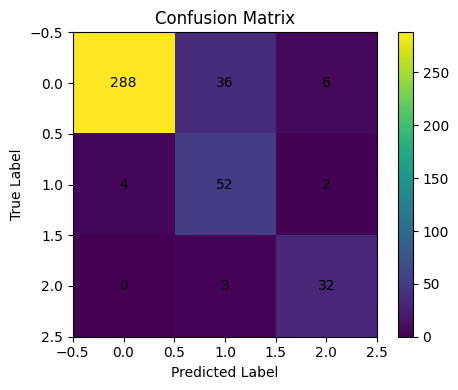

In [ ]:
# رسم Confusion Matrix
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize=(5, 4))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# كتابة الأرقام داخل المربعات
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center")

plt.tight_layout()
plt.show()


**7) Ensemble: Soft Voting**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

voting = VotingClassifier(
    estimators=[
        ("rf", pipelines["RandomForest"]),
        ("svm", pipelines["SVM"]),
        ("lr", pipelines["LogReg"])
    ],
    voting="soft"
)

# تدريب النموذج
voting.fit(X_train, y_train)

# تنبؤات التدريب
pred_train = voting.predict(X_train)

# تنبؤات الاختبار
pred_test = voting.predict(X_test)

print("\nVoting Ensemble:")
print("Voting Train Accuracy :", accuracy_score(y_train, pred_train))
print("Voting Test Accuracy  :", accuracy_score(y_test, pred_test))
print("Voting Test F1-macro  :", f1_score(y_test, pred_test, average="macro"))



Voting Ensemble:
Voting Train Accuracy : 0.9573964497041421
Voting Test Accuracy  : 0.9243498817966903
Voting Test F1-macro  : 0.875754308791436


**8) Hyperparameter tuning**

In [ ]:

rf_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", RandomForestClassifier(
        random_state=42,
        class_weight="balanced"
    ))
])

param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10]
}

gs = GridSearchCV(
    rf_pipe,
    param_grid,
    cv=5,
    scoring="accuracy"
)

gs.fit(X_train, y_train)

best_rf = gs.best_estimator_
pred_rf = best_rf.predict(X_test)

acc_rf_opt = accuracy_score(y_test, pred_rf)




print("Best parameters:", gs.best_params_)
print("Best CV Accuracy:", gs.best_score_)
print("Test Accuracy:", accuracy_score(y_test, pred_rf))


Best parameters: {'model__max_depth': None, 'model__n_estimators': 200}
Best CV Accuracy: 0.9378698224852071
Test Accuracy: 0.9456264775413712


In [ ]:


svc_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", SVC(
        kernel="rbf",
        class_weight="balanced"
    ))
])

svc_param_grid = {
    "model__C": [0.1, 1, 10],
    "model__gamma": ["scale", "auto"]
}

svc_gs = GridSearchCV(
    svc_pipe,
    param_grid=svc_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

svc_gs.fit(X_train, y_train)

best_svc = svc_gs.best_estimator_
pred_svc = best_svc.predict(X_test)

acc_svc_opt = accuracy_score(y_test, pred_svc)


print("\n=== Optimized SVC ===")
print("Best Parameters:", svc_gs.best_params_)
print("Best CV Accuracy:", svc_gs.best_score_)
print("Test Accuracy:", accuracy_score(y_test, pred_svc))



=== Optimized SVC ===
Best Parameters: {'model__C': 10, 'model__gamma': 'scale'}
Best CV Accuracy: 0.8982248520710059
Test Accuracy: 0.9196217494089834


In [ ]:


dt_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced"
    ))
])

dt_param_grid = {
    "model__max_depth": [None, 5, 10, 20],
    "model__min_samples_split": [2, 5, 10]
}

dt_gs = GridSearchCV(
    dt_pipe,
    param_grid=dt_param_grid,
    cv=5,
    scoring="accuracy"
)

dt_gs.fit(X_train, y_train)

best_dt = dt_gs.best_estimator_
pred_dt = best_dt.predict(X_test)

acc_dt_opt = accuracy_score(y_test, pred_dt)


print("\n=== Optimized Decision Tree ===")
print("Best Parameters:", dt_gs.best_params_)
print("Best CV Accuracy:", dt_gs.best_score_)
print("Test Accuracy:", accuracy_score(y_test, pred_dt))



=== Optimized Decision Tree ===
Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 2}
Best CV Accuracy: 0.9124260355029585
Test Accuracy: 0.9196217494089834


In [ ]:


knn_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),   # مهم جدًا للـKNN
    ("model", KNeighborsClassifier())
])

knn_param_grid = {
    "model__n_neighbors": [3, 5, 7, 9],
    "model__weights": ["uniform", "distance"]
}

knn_gs = GridSearchCV(
    knn_pipe,
    param_grid=knn_param_grid,
    cv=5,
    scoring="accuracy"
)

knn_gs.fit(X_train, y_train)

best_knn = knn_gs.best_estimator_
pred_knn = best_knn.predict(X_test)

acc_knn_opt = accuracy_score(y_test, pred_knn)


print("\n=== Optimized KNN ===")
print("Best Parameters:", knn_gs.best_params_)
print("Best CV Accuracy:", knn_gs.best_score_)
print("Test Accuracy:", accuracy_score(y_test, pred_knn))



=== Optimized KNN ===
Best Parameters: {'model__n_neighbors': 7, 'model__weights': 'distance'}
Best CV Accuracy: 0.8988165680473374
Test Accuracy: 0.9078014184397163


In [ ]:


lr_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        solver="lbfgs"
    ))
])

lr_param_grid = {
    "model__C": [0.01, 0.1, 1, 10]
}

lr_gs = GridSearchCV(
    lr_pipe,
    param_grid=lr_param_grid,
    cv=5,
    scoring="accuracy"
)

lr_gs.fit(X_train, y_train)

best_lr = lr_gs.best_estimator_
pred_lr = best_lr.predict(X_test)

acc_lr_opt = accuracy_score(y_test, pred_lr)


print("\n=== Optimized Logistic Regression ===")
print("Best Parameters:", lr_gs.best_params_)
print("Best CV Accuracy:", lr_gs.best_score_)
print("Test Accuracy:", accuracy_score(y_test, pred_lr))



=== Optimized Logistic Regression ===
Best Parameters: {'model__C': 0.1}
Best CV Accuracy: 0.8609467455621302
Test Accuracy: 0.8605200945626478


In [ ]:
final_table = pd.DataFrame([
    ["Optimized Logistic Regression", acc_lr_opt],
    ["Optimized KNN", acc_knn_opt],
    ["Optimized Decision Tree", acc_dt_opt],
    ["Optimized Random Forest", acc_rf_opt],
    ["Optimized SVC", acc_svc_opt],
], columns=["Model", "Test Accuracy"]).sort_values(by="Test Accuracy", ascending=False)

print("\n=== Final Optimized Classification Comparison Table ===")
print(final_table)



=== Final Optimized Classification Comparison Table ===
                           Model  Test Accuracy
3        Optimized Random Forest       0.945626
4                  Optimized SVC       0.919622
2        Optimized Decision Tree       0.919622
1                  Optimized KNN       0.907801
0  Optimized Logistic Regression       0.860520
